In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2017)

In [3]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

In [4]:
# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area"
                                      : "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]

#set zipcode as index
census_pd = census_pd.set_index("Zipcode")

# Visualize
census_pd


,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
Zipcode,,,,,,
00601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915
00602,39209.0,40.9,16190.0,8978.0,20428.0,52.100283
00603,50135.0,40.4,16645.0,10897.0,25176.0,50.216416
00606,6304.0,42.8,13387.0,5960.0,4092.0,64.911168
00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498369
...,...,...,...,...,...,...
99923,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,NaN
99925,901.0,45.1,48646.0,24783.0,210.0,23.307436
99926,1684.0,32.8,57969.0,22927.0,224.0,13.301663


In [5]:
#create DataFrame for only Brooklyn zipcodes
brooklyn_df = census_pd.loc[["10026", "10027", "10030", "10037", "10039",  
                          "10001", "10011", "10018", "10019", "10036",  
                          "10029", "10035",  
                          "10010", "10016", "10017", "10022",  
                          "10012", "10013", "10014", 
                          "10004", "10005", "10006", "10007", "10038", "10280",  
                          "10002", "10003", "10009", 
                             "10021", "10028", "10044", "10065", "10075", "10128", 
                             "10023", "10024", "10025", 
                             "10031", "10032", "10033", "10034", "10040"], :]

#add borough column
brooklyn_df['Borough'] = "Brooklyn"

In [6]:
#create DataFrame for only Bronx zipcodes
bronx_df = census_pd.loc[["10453", "10457", "10460", 
                          "10458", "10467", "10468", 
                          "10451", "10452", "10456", 
                          "10454", "10455", "10459", "10474", 
                          "10463", "10471", 
                          "10466", "10469", "10470", "10475", 
                          "10461", "10462", "10464", "10465", "10472", "10473"], :]

#add borough column
bronx_df['Borough'] = "Bronx"

In [7]:
#create DataFrame for only Manhattan zipcodes
manhattan_df = census_pd.loc[["10026", "10027", "10030", "10037", "10039", 
                          "10001", "10011", "10018", "10019", "10036", 
                          "10029", "10035", 
                          "10010", "10016", "10017", "10022", 
                          "10012", "10013", "10014", 
                          "10004", "10005", "10006", "10007", "10038", "10280", 
                              "10002", "10003", "10009", "10021", "10028", "10044", 
                              "10065", "10075", "10128", "10023", "10024", "10025", 
                              "10031", "10032", "10033", "10034", "10040"], :]

#add borough column
manhattan_df['Borough'] = "Manhattan"

In [8]:
#create DataFrame for only Staten Island zipcodes
staten_is_df = census_pd.loc[["10302", "10303", "10310", 
                          "10306", "10307", "10308", "10309", "10312", 
                          "10301", "10304", "10305", 
                          "10314"], :]

#add borough column
staten_is_df['Borough'] = "Staten Island"

In [9]:
#create DataFrame for only Queens zipcodes
queens_df = census_pd.loc[["11361", "11362", "11363", "11364", 
                           "11354", "11355", "11356", "11357", "11358", 
                           "11360", "11365", "11366", "11367", 
                           "11412", "11423", "11432", "11433", "11434", "11435", "11436", 
                           "11101", "11102", "11103", "11104", "11105", "11106", 
                           "11374", "11375", "11379", "11385", 
                           "11691", "11692", "11693", "11694", "11697", 
                           "11004", "11005", "11411", "11413", "11422", "11426", "11427", 
                           "11428", "11429", "11414", "11415", "11416", "11417", 
                           "11418", "11419", "11420", "11421", 
                           "11368", "11369", "11370", "11372", "11373", "11377", 
                           "11378"], :]

#add borough column
queens_df['Borough'] = "Queens"

In [10]:
#combine borough DataFrames to one DataFrame
combined_data = pd.concat([bronx_df, brooklyn_df, manhattan_df, staten_is_df, queens_df], axis=0)
combined_data.head()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Borough
Zipcode,,,,,,,
10453,82232.0,30.1,24421.0,13386.0,33803.0,41.106868,Bronx
10457,75668.0,29.4,27036.0,13952.0,28098.0,37.133266,Bronx
10460,60772.0,31.6,25948.0,14716.0,22788.0,37.497532,Bronx
10458,85157.0,28.9,32129.0,15612.0,29634.0,34.799253,Bronx
10467,102718.0,33.9,35381.0,18402.0,30253.0,29.452482,Bronx


In [11]:
#Delete unneeded columns
del combined_data ["Poverty Count"]
del combined_data ["Median Age"]

In [12]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

In [13]:
#read in lottery csv
lottery_df = pd.read_csv('NYS_Lottery_Retailers.csv')
lottery_df

,Retailer,Name,Street,City,State,Zip,Quick Draw,Latitude,Longitude,Location 1
0,106629,LONG ISLAND WINES AND LIQUORS,295 MONTAUK HIGHWAY,SPEONK,NY,11972,NaN,40.819012,-72.704034,"(40.819012, -72.704034)"
1,70092,UNION HOUSE INN,22-24 HEPPER STREET,WALDEN,NY,12586,Y,41.559826,-74.185246,"(41.559826, -74.185246)"
2,76104,KWIK FILL #397,3635 RT 78,STRYKERSVILLE,NY,14145,NaN,42.710950,-78.456114,"(42.71095, -78.456114)"
3,31201,PRICE CHOPPER #181,79 VANDENBURG AVE,TROY,NY,12180,Y,42.705053,-73.690551,"(42.705053, -73.690551)"
4,106198,ROUTE 51 BEER BELLY BOB'S LLC,70 OTSEGO ST,ILION,NY,13357,Y,43.013712,-75.037112,"(43.013712, -75.037112)"
...,...,...,...,...,...,...,...,...,...,...
15975,40503,PRICE CHOPPER #174,4713 ONONDAGA BLVD,SYRACUSE,NY,13219,Y,43.032592,-76.192936,"(43.032592, -76.192936)"
15976,74120,SPEEDWAY #07893,1173 JERICHO TPK,COMMACK,NY,11725,NaN,40.846340,-73.266838,"(40.84634, -73.266838)"
15977,73969,RITE AID #4982,1640 HOPKINS RD,WILLIAMSVILLE,NY,14221,Y,43.024363,-78.738014,"(43.024363, -78.738014)"
15978,64420,STOP & SHOP #0577,3577 LONG BEACH ROAD,OCEANSIDE,NY,11572,Y,40.624321,-73.639623,"(40.624321, -73.639623)"


In [14]:
del lottery_df ["Quick Draw"]
del lottery_df ["Location 1"]
del lottery_df ["Street"]
del lottery_df ["Latitude"]
del lottery_df ["Longitude"]
del lottery_df ["Name"]
del lottery_df ["City"]
del lottery_df ["State"]
del lottery_df ["Retailer"]

#rename Zip to Zipcode
lottery_df = lottery_df.rename(columns={"Zip":"Zipcode"})

In [15]:
combined_data

,Population,Household Income,Per Capita Income,Poverty Rate,Borough
Zipcode,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx
10457,75668.0,27036.0,13952.0,37.133266,Bronx
10460,60772.0,25948.0,14716.0,37.497532,Bronx
10458,85157.0,32129.0,15612.0,34.799253,Bronx
10467,102718.0,35381.0,18402.0,29.452482,Bronx
...,...,...,...,...,...
11370,33789.0,59901.0,22720.0,9.541567,Queens
11372,64298.0,53963.0,27761.0,13.863573,Queens
11373,96353.0,49098.0,22249.0,18.034726,Queens


In [16]:
combined_data['index_num']=combined_data.index.astype(int)
combined_data['Zipcode']=combined_data.index.astype(int)

In [17]:
combined_data=combined_data.set_index('index_num')

In [18]:
combined_data

,Population,Household Income,Per Capita Income,Poverty Rate,Borough,Zipcode
index_num,,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453
10457,75668.0,27036.0,13952.0,37.133266,Bronx,10457
10460,60772.0,25948.0,14716.0,37.497532,Bronx,10460
10458,85157.0,32129.0,15612.0,34.799253,Bronx,10458
10467,102718.0,35381.0,18402.0,29.452482,Bronx,10467
...,...,...,...,...,...,...
11370,33789.0,59901.0,22720.0,9.541567,Queens,11370
11372,64298.0,53963.0,27761.0,13.863573,Queens,11372
11373,96353.0,49098.0,22249.0,18.034726,Queens,11373


In [19]:
#borough_avg_inc = combined_data.groupby('Borough')['Household Income'].mean()
#borough_avg_inc

# Create a group based on the values in the 'maker' column
borough_avg = combined_data.groupby('Borough')

# Count how many times each maker appears in our group
avg_income = borough_avg['Household Income'].mean()

avg_income

Borough
Bronx            42134.800000
Brooklyn         95163.142857
Manhattan        95163.142857
Queens           66793.813559
Staten Island    75213.583333
Name: Household Income, dtype: float64

In [20]:
combined_data2 = combined_data.merge(avg_income, left_on='Borough', right_index=True)
combined_data2 = combined_data2.rename(columns = {"Household Income_y":"Average Household Income (Per Borough)", 
                                                 "Household Income_x":"Average Household Income (Zipcode)"})
combined_data2

,Population,Average Household Income (Zipcode),Per Capita Income,Poverty Rate,Borough,Zipcode,Average Household Income (Per Borough)
index_num,,,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000
10457,75668.0,27036.0,13952.0,37.133266,Bronx,10457,42134.800000
10460,60772.0,25948.0,14716.0,37.497532,Bronx,10460,42134.800000
10458,85157.0,32129.0,15612.0,34.799253,Bronx,10458,42134.800000
10467,102718.0,35381.0,18402.0,29.452482,Bronx,10467,42134.800000
...,...,...,...,...,...,...,...
11370,33789.0,59901.0,22720.0,9.541567,Queens,11370,66793.813559
11372,64298.0,53963.0,27761.0,13.863573,Queens,11372,66793.813559
11373,96353.0,49098.0,22249.0,18.034726,Queens,11373,66793.813559


In [21]:
combined_data3 = pd.merge(combined_data2, lottery_df, left_index=True, right_on='Zipcode')
combined_data3

,Zipcode,Population,Average Household Income (Zipcode),Per Capita Income,Poverty Rate,Borough,Zipcode_x,Average Household Income (Per Borough),Zipcode_y
775,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000,10453
1433,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000,10453
1613,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000,10453
1638,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000,10453
2100,10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.800000,10453
...,...,...,...,...,...,...,...,...,...
14105,11378,35844.0,68460.0,32263.0,9.290258,Queens,11378,66793.813559,11378
14515,11378,35844.0,68460.0,32263.0,9.290258,Queens,11378,66793.813559,11378
14579,11378,35844.0,68460.0,32263.0,9.290258,Queens,11378,66793.813559,11378
14825,11378,35844.0,68460.0,32263.0,9.290258,Queens,11378,66793.813559,11378


In [22]:
#rename Household Income_y to Average house hold income for borough
combined_data3 = combined_data3.rename(columns={"Poverty Rate":"Poverty Rate(%)",
                                               "Per Capita Income":"Per Capita Income (Per Zipcode)"})

del combined_data3 ["Zipcode_x"]
del combined_data3 ["Zipcode_y"]

combined_data3

,Zipcode,Population,Average Household Income (Zipcode),Per Capita Income (Per Zipcode),Poverty Rate(%),Borough,Average Household Income (Per Borough)
775,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.800000
1433,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.800000
1613,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.800000
1638,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.800000
2100,10453,82232.0,24421.0,13386.0,41.106868,Bronx,42134.800000
...,...,...,...,...,...,...,...
14105,11378,35844.0,68460.0,32263.0,9.290258,Queens,66793.813559
14515,11378,35844.0,68460.0,32263.0,9.290258,Queens,66793.813559
14579,11378,35844.0,68460.0,32263.0,9.290258,Queens,66793.813559
14825,11378,35844.0,68460.0,32263.0,9.290258,Queens,66793.813559


In [23]:
#combined_data3.groupby('Borough')['Household Income_y'].agg(['count', 'mean'])
retailers_count = combined_data3.groupby('Borough')['Average Household Income (Per Borough)'].agg(['count'])
retailers_count

,count
Borough,
Bronx,1009
Brooklyn,1069
Manhattan,1069
Queens,1673
Staten Island,347


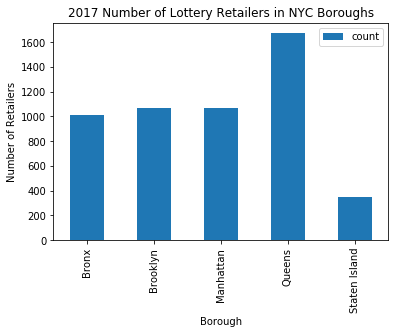

<Figure size 432x288 with 0 Axes>

In [24]:
# Chart our borough count data, give it a title, and label the axes
count_chart = retailers_count.plot(kind="bar", title="2017 Number of Lottery Retailers in NYC Boroughs")
count_chart.set_xlabel("Borough")
count_chart.set_ylabel("Number of Retailers")

plt.show()
plt.tight_layout()

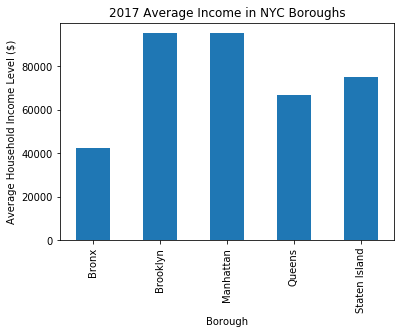

<Figure size 432x288 with 0 Axes>

In [25]:
# Split up our data into groups based upon 'borough'
boroughs = combined_data3.groupby('Borough')

# Find out the average income per borough
avg_incomes = boroughs['Average Household Income (Per Borough)'].mean()

# Chart our data, give it a title, and label the axes
income_chart = avg_incomes.plot(kind="bar", title="2017 Average Income in NYC Boroughs")
income_chart.set_xlabel("Borough")
income_chart.set_ylabel("Average Household Income Level ($)")

plt.show()
plt.tight_layout()

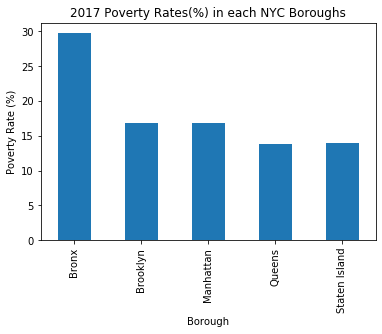

<Figure size 432x288 with 0 Axes>

In [26]:
# Find out the average income per borough
avg_poverty_rates = boroughs['Poverty Rate(%)'].mean()

# Chart our data, give it a title, and label the axes
poverty_chart = avg_poverty_rates.plot(kind="bar", title="2017 Poverty Rates(%) in each NYC Boroughs")
poverty_chart.set_xlabel("Borough")
poverty_chart.set_ylabel("Poverty Rate (%)")

plt.show()
plt.tight_layout()

In [ ]:
# Find out the average income per capita per borough
avg_poverty_rates = boroughs['Poverty Rate(%)'].mean()

# Chart our data, give it a title, and label the axes
poverty_chart = avg_poverty_rates.plot(kind="bar", title="2017 Poverty Rates(%) in each NYC Boroughs")
poverty_chart.set_xlabel("Borough")
poverty_chart.set_ylabel("Poverty Rate (%)")

plt.show()
plt.tight_layout()

In [27]:
#combined_data3.groupby('Borough')['Average Household Income per Borough'].agg(['count', 'mean']).plot(kind='scatter', x='mean', y='count')
#combined_data3.groupby('Borough')['Average Household Income per Borough'].agg(['count', 'mean']).plot(kind='bar')

In [33]:
bronx_lott_df = combined_data2.loc[combined_data2.loc[:, 'Borough']=='Bronx', :]
bronx_lott_df

,Population,Average Household Income (Zipcode),Per Capita Income,Poverty Rate,Borough,Zipcode,Average Household Income (Per Borough)
index_num,,,,,,,
10453,82232.0,24421.0,13386.0,41.106868,Bronx,10453,42134.8
10457,75668.0,27036.0,13952.0,37.133266,Bronx,10457,42134.8
10460,60772.0,25948.0,14716.0,37.497532,Bronx,10460,42134.8
10458,85157.0,32129.0,15612.0,34.799253,Bronx,10458,42134.8
10467,102718.0,35381.0,18402.0,29.452482,Bronx,10467,42134.8
10468,77657.0,35398.0,16902.0,31.887660,Bronx,10468,42134.8
10451,48240.0,26979.0,19116.0,35.383499,Bronx,10451,42134.8
10452,77983.0,27206.0,14142.0,38.240386,Bronx,10452,42134.8
10456,94667.0,26724.0,14424.0,39.654790,Bronx,10456,42134.8


In [38]:
#combined_data3.groupby('Borough')['Household Income_y'].agg(['count', 'mean'])
retailers_count = combined_data3.groupby('Borough')['Average Household Income (Per Borough)'].agg(['count'])
retailers_count

,count
Borough,
Bronx,1009
Brooklyn,1069
Manhattan,1069
Queens,1673
Staten Island,347


In [41]:
#combined_data3.groupby('Borough')['Household Income_y'].agg(['count', 'mean'])
borough_population = combined_data3.groupby('Borough')['Population'].agg(['sum'])
borough_population

,sum
Borough,
Bronx,68368012.0
Brooklyn,47412250.0
Manhattan,47412250.0
Queens,94386070.0
Staten Island,15910121.0


In [36]:
#bronx_pop = bronx_lott_df['Population'].sum()
#retailer per capita vs. income per capita 
#retailer per capita = retailers_count/borough_population


#retailer_per_capita = ('retailers_count')/('borough_population')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [28]:
brooklyn_lott_df = combined_data3.loc[combined_data3.loc[:, 'Borough']=='Brooklyn', :]


In [29]:
manhattan_lott_df = combined_data3.loc[combined_data3.loc[:, 'Borough']=='Manhattan', :]

In [30]:
queens_lott_df = combined_data3.loc[combined_data3.loc[:, 'Borough']=='Queens', :]

In [31]:
staten_is_lott_df = combined_data3.loc[combined_data3.loc[:, 'Borough']==
                                       'Staten Island', :]